<a href="https://colab.research.google.com/github/Malikumair786/Machine_Learning/blob/main/project7_Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

WorkFlow:

Car data --> Data pre processing --> train test split --> linear and Lasso regression --> Trained Linear Regression --> New Data --> predict Car price

Importing the Dependencies

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data Collection and pre processing

In [18]:
car_dataset = pd.read_csv('/content/car data.csv')

In [19]:
car_dataset.shape

(301, 9)

In [20]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [21]:
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [22]:
car_dataset.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [23]:
car_dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [24]:
#checking the distribution  of categorical data
print(car_dataset.Fuel_Type.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64


In [25]:
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


Encoding the categorrical data

In [26]:
#Now we have to convert the text to numeric value
#encoding the Fuel Type and transmission column
car_dataset.replace({'Fuel_Type':{'Petrol': 0, 'Diesel': 1, 'CNG': 2},
                                   'Transmission':{'Manual': 0, 'Automatic': 1}
                                   },inplace = True)

In [27]:
#encoding the Seller_Type and transmission column
car_dataset.replace({'Seller_Type':{'Dealer': 0, 'Individual': 1}},inplace = True)

In [28]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [31]:
print(car_dataset.Owner.value_counts())

0    290
1     10
3      1
Name: Owner, dtype: int64


In [32]:
X = car_dataset.drop(['Car_Name','Selling_Price'],axis = 1)
Y = car_dataset['Selling_Price']

In [33]:
print(X)
print(Y)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

Splitting trainign and test data

In [36]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.1, random_state = 2)

In [37]:
print(X.shape,X_train.shape,X_test.shape)

(301, 7) (270, 7) (31, 7)


Model Training:

1. Linear Regression

In [38]:
#loaiding the linear regression model
lin_reg = LinearRegression()
 

In [39]:
lin_reg.fit(X_train,Y_train)

LinearRegression()

Evaluation

In [40]:
# prediction on training data
train_data_prediction = lin_reg.predict(X_train)

In [41]:
# R squared error
error_score = metrics.r2_score(Y_train,train_data_prediction)
print("The R squared error is: ",error_score)

The R squared error is:  0.8799451660493711


WE use Accuracy score for classification problem and we use R squared error for regression problem.

Visualize the actual price and predicted prices

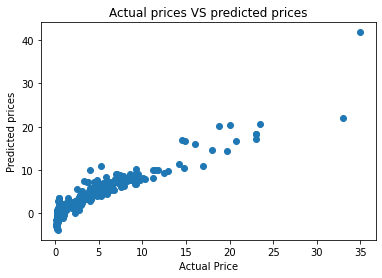

In [42]:
#plot the predicted and actual value
plt.scatter(Y_train,train_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted prices")
plt.title("Actual prices VS predicted prices")
plt.show()

In [43]:
#test data prediction
test_data_prediction = lin_reg.predict(X_test)

In [44]:
# R squared error
error_score = metrics.r2_score(Y_test,test_data_prediction)
print("The R squared error is: ",error_score)

The R squared error is:  0.8365766715027051


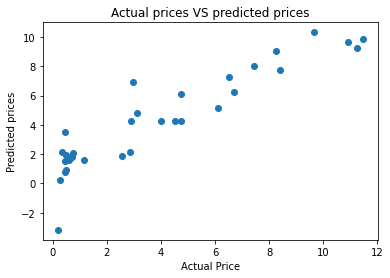

In [45]:
#plot the predicted and actual value
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted prices")
plt.title("Actual prices VS predicted prices")
plt.show()

**Lasso Regression**

In [46]:
lasso_reg = Lasso()

In [47]:
lasso_reg.fit(X_train,Y_train)

Lasso()

In [49]:
training_data_prediction = lasso_reg.predict(X_train)

In [51]:
#R squared Error
error_score = metrics.r2_score(Y_train,train_data_prediction)
print("R sqyuared error for lasso regression on training data : ",error_score)

R sqyuared error for lasso regression on training data :  0.8799451660493711


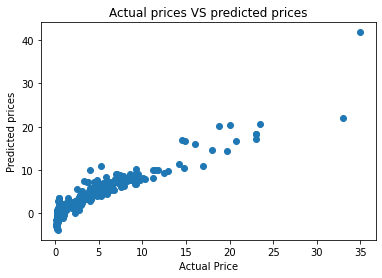

In [52]:
#plot the predicted and actual value
plt.scatter(Y_train,train_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted prices")
plt.title("Actual prices VS predicted prices")
plt.show()

In [53]:
test_data_prediction = lasso_reg.predict(X_test)

In [54]:
#R squared Error
error_score = metrics.r2_score(Y_test,test_data_prediction)
print("R sqyuared error for lasso regression on test data : ",error_score)

R sqyuared error for lasso regression on test data :  0.8709167941173195


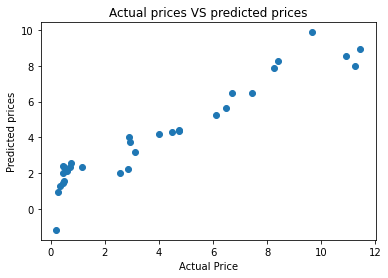

In [55]:
#plot the predicted and actual value
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted prices")
plt.title("Actual prices VS predicted prices")
plt.show()